In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf
df = yf.download('005930.KS','2021-01-01','2023-10-01')
df.to_excel("삼성전자.xlsx")
df.to_csv("삼성전자.csv")

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-21,69200.0,69800.0,68800.0,68900.0,68900.0,10796336
2023-09-22,68300.0,68900.0,68300.0,68800.0,68800.0,9897840
2023-09-25,68500.0,69700.0,68500.0,69400.0,69400.0,13582516
2023-09-26,70000.0,70000.0,68400.0,68600.0,68600.0,13143470
2023-09-27,68600.0,69100.0,68200.0,68400.0,68400.0,14886491


In [4]:
df.shape

(677, 6)

In [5]:
data = df['Close'].values.reshape(-1, 1)

In [6]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [7]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        sequences.append(seq)
    return np.array(sequences)

In [8]:
sequence_length = 10
sequences = create_sequences(data, sequence_length)
X = sequences[:, :-1]
y = sequences[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(sequence_length-1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
9/9 [==============================] - 0s 2ms/step - loss: 0.1841
Epoch 2/50
9/9 [==============================] - 0s 1ms/step - loss: 0.1252
Epoch 3/50
9/9 [==============================] - 0s 1ms/step - loss: 0.0752
Epoch 4/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0361
Epoch 5/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 6/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 7/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 8/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 9/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 10/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 11/50
9/9 [==============================] - 0s 2ms/step - loss: 9.2280e-04
Epoch 12/50
9/9 [==============================] - 0s 2ms/step - loss: 8.8280e-04
Epoch 13/50
9/9 [==============================] - 0s 2ms/step - 

In [11]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"훈련 손실: {train_loss:.5f}")
print(f"테스트 손실: {test_loss:.5f}")

훈련 손실: 0.00070
테스트 손실: 0.00080


In [12]:
predicted = model.predict(X_test)

5/5 [==============================] - 0s 704us/step


In [13]:
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test)

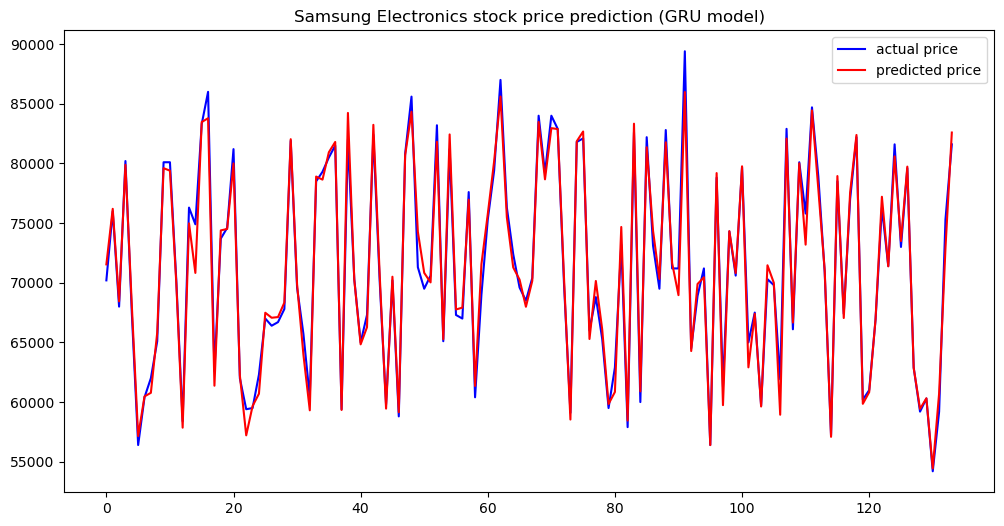

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='actual price', color='blue')
plt.plot(predicted, label='predicted price', color='red')
plt.title('Samsung Electronics stock price prediction (GRU model)')
plt.legend()
plt.show()